In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [46]:
dataset = pd.read_csv("train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
# Drop the specified columns
columns_to_drop = ['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked']
dataset = dataset.drop(columns=columns_to_drop)

# Create a new column 'FamilySize' by adding 'SibSp' and 'Parch'
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
dataset = dataset.drop(columns=['SibSp', 'Parch'])

# Define the bins for age ranges
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,FamilySize,AgeGroup
0,1,0,3,male,22.0,1,20-30
1,2,1,1,female,38.0,1,30-40
2,3,1,3,female,26.0,0,20-30
3,4,1,1,female,35.0,1,30-40
4,5,0,3,male,35.0,0,30-40


In [48]:
dataset_cleaned = dataset.dropna()
dataset_encoded = pd.get_dummies(dataset_cleaned, columns=['Sex', 'AgeGroup'])

dataset_encoded.head()

,PassengerId,Survived,Pclass,Age,FamilySize,Sex_female,Sex_male,AgeGroup_0-10,AgeGroup_10-20,AgeGroup_20-30,AgeGroup_30-40,AgeGroup_40-50,AgeGroup_50-60,AgeGroup_60-70,AgeGroup_70-80,AgeGroup_80-90
0,1,0,3,22.0,1,False,True,False,False,True,False,False,False,False,False,False
1,2,1,1,38.0,1,True,False,False,False,False,True,False,False,False,False,False
2,3,1,3,26.0,0,True,False,False,False,True,False,False,False,False,False,False
3,4,1,1,35.0,1,True,False,False,False,False,True,False,False,False,False,False
4,5,0,3,35.0,0,False,True,False,False,False,True,False,False,False,False,False


In [49]:
X, y = (dataset_encoded.drop(columns=['Survived']), dataset_encoded['Survived'])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [50]:
names = [
    "Logistic Regression",
    "Naive Bayes",
    "KNN",
    "Linear SVM",
    "SVM RBF kernel",
    "MLP 1 hidden layer",
    "MLP 2 hidden layer",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting"
]

classifiers = [
    LogisticRegression(),
    GaussianNB(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    MLPClassifier(hidden_layer_sizes=(100,), alpha=1, max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(100, 100), alpha=1, max_iter=1000, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
]

In [51]:
# figure = plt.figure(figsize=(27, 9))
# n_classifiers = len(classifiers)

# # Plotting
# for i, clf in enumerate(classifiers):
#     ax = plt.subplot(1, n_classifiers, i + 1)
#     clf = make_pipeline(StandardScaler(), clf)
    
#     # Track scores for each fold
#     scores = []
#     for train_index, test_index in kf.split(X):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
#         # Fit the classifier and calculate accuracy
#         clf.fit(X_train, y_train)
#         y_pred = clf.predict(X_test)
#         score = accuracy_score(y_test, y_pred)
#         scores.append(score)
    
#     # Calculate average score across folds
#     avg_score = np.mean(scores)
    
#     # Scatter plot
#     # ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cm_bright, edgecolors="k", label="Training data")
#     ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, alpha=0.6, edgecolors="k")
#     ax.set_xlim(X.values[:, 0].min() - 0.5, X.values[:, 0].max() + 0.5)
#     ax.set_ylim(X.values[:, 1].min() - 0.5, X.values[:, 1].max() + 0.5)
#     ax.set_xticks(())
#     ax.set_yticks(())
#     ax.set_title(names[i])
#     ax.text(X.values[:, 0].max() - 0.3, X.values[:, 1].min() + 0.3, f"Accuracy: {avg_score:.3f}", size=15, horizontalalignment="right")
#     ax.legend(loc='lower right')

# plt.tight_layout()
# plt.show()


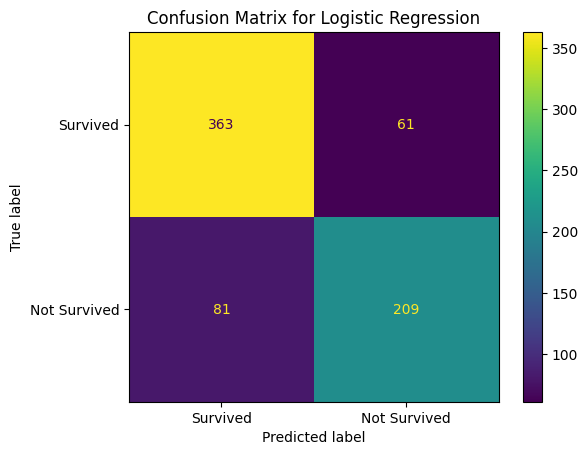

Average Accuracy Logistic Regression: 0.801
Average Precision Logistic Regression: 0.776
Average Recall Logistic Regression: 0.725
Average F1 Score Logistic Regression: 0.747


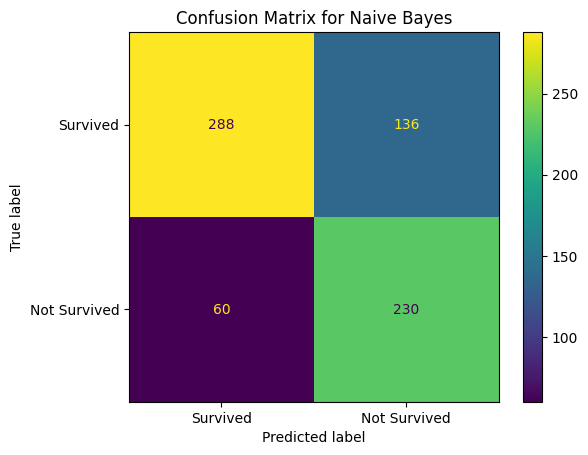

Average Accuracy Naive Bayes: 0.725
Average Precision Naive Bayes: 0.690
Average Recall Naive Bayes: 0.794
Average F1 Score Naive Bayes: 0.718


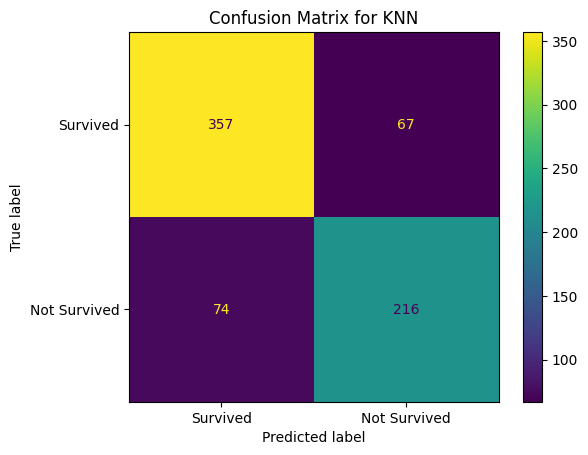

Average Accuracy KNN: 0.803
Average Precision KNN: 0.767
Average Recall KNN: 0.748
Average F1 Score KNN: 0.755


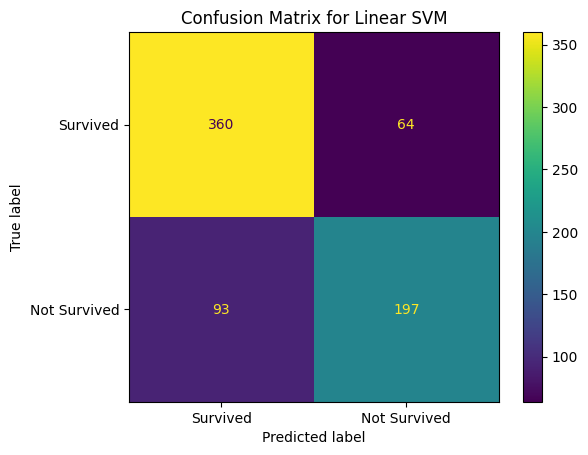

Average Accuracy Linear SVM: 0.780
Average Precision Linear SVM: 0.755
Average Recall Linear SVM: 0.681
Average F1 Score Linear SVM: 0.716


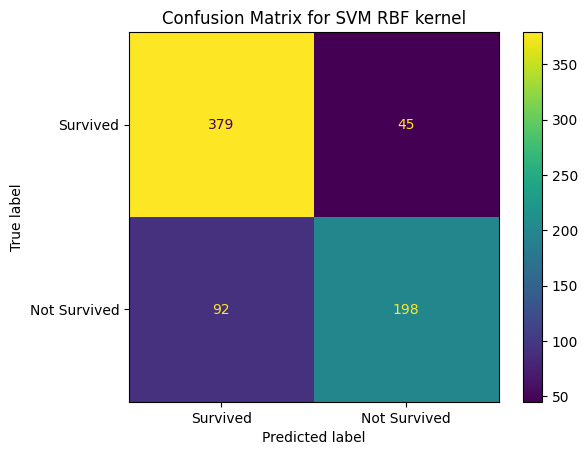

Average Accuracy SVM RBF kernel: 0.808
Average Precision SVM RBF kernel: 0.818
Average Recall SVM RBF kernel: 0.687
Average F1 Score SVM RBF kernel: 0.744


In [60]:
# Plotting
for i, clf in enumerate(classifiers):
    clf = make_pipeline(StandardScaler(), clf)
    
    # Track scores for each fold
    scores = []
    precisions = []
    recalls = []
    f1_scores = []
    all_true = []
    all_pred = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Fit the classifier and calculate metrics
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)
        
        precision = precision_score(y_test, y_pred)
        precisions.append(precision)
        
        recall = recall_score(y_test, y_pred)
        recalls.append(recall)
        
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)
        
        all_true.extend(y_test)
        all_pred.extend(y_pred)
    
    # Calculate average scores across folds
    avg_score = np.mean(scores)
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1 = np.mean(f1_scores)
    
    # Plot confusion matrix
    cm = confusion_matrix(all_true, all_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Survived', 'Not Survived'])
    disp.plot()
    title = "Confusion Matrix" if names[i] == "" else "Confusion Matrix for " + names[i]
    plt.title(title)
    plt.show()

    print(f"Average Accuracy {names[i]}: {avg_score:.3f}")
    print(f"Average Precision {names[i]}: {avg_precision:.3f}")
    print(f"Average Recall {names[i]}: {avg_recall:.3f}")
    print(f"Average F1 Score {names[i]}: {avg_f1:.3f}")
